In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
input_dir = r"/content/drive/MyDrive/Colab Notebooks/pc_parts"
output_dir = r"/content/drive/MyDrive/Colab Notebooks/PC_Parts_Set"

In [ ]:
pip install split-folders


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(0.8,0.0,0.2))


Copying files: 3279 files [01:03, 51.79 files/s]


In [8]:
train_dir = r"/content/drive/MyDrive/Colab Notebooks/PC_Parts_Set/train"
test_dir = r"/content/drive/MyDrive/Colab Notebooks/PC_Parts_Set/test"

In [9]:
batch_size = 32

In [10]:
train_dataset = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
    )

In [11]:
test_dataset = ImageDataGenerator(rescale= 1./255)

In [12]:
X_train = train_dataset.flow_from_directory(
    train_dir,
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 2616 images belonging to 14 classes.


In [13]:
X_test = test_dataset.flow_from_directory(
    test_dir,
    batch_size = batch_size,
    class_mode = "categorical"
)

Found 663 images belonging to 14 classes.


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3,3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3,3), activation= 'relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(14, activation='softmax')

])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history  = model.fit(X_train, epochs=40, validation_data=X_test)

Epoch 1/40
82/82 [==============================] - 1507s 18s/step - loss: 2.6687 - accuracy: 0.0910 - val_loss: 2.5915 - val_accuracy: 0.1056
Epoch 2/40
82/82 [==============================] - 617s 8s/step - loss: 2.5781 - accuracy: 0.1239 - val_loss: 2.4976 - val_accuracy: 0.1418
Epoch 3/40
44/82 [===============>..............] - ETA: 4:26 - loss: 2.4661 - accuracy: 0.1570

In [ ]:
import matplotlib.pyplot as plt

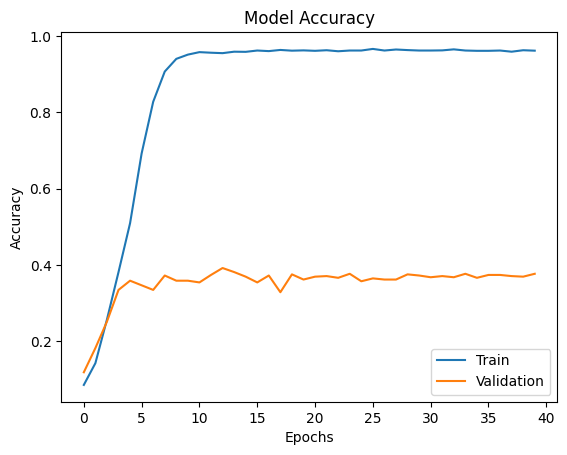

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
class_label = X_train.class_indices

In [ ]:
class_name = {value:key  for key, value in class_label.items()  }

In [ ]:
class_name

{0: 'cables',
 1: 'case',
 2: 'cpu',
 3: 'gpu',
 4: 'hdd',
 5: 'headset',
 6: 'keyboard',
 7: 'microphone',
 8: 'monitor',
 9: 'motherboard',
 10: 'mouse',
 11: 'ram',
 12: 'speakers',
 13: 'webcam'}

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img_path = r"/content/images.jpg"

In [ ]:
def predict_img(imgpath):
  img = image.load_img(imgpath, target_size=(256, 256))
  img_arr = image.img_to_array(img)
  img_arr = np.expand_dims(img_arr, axis=0)
  img_arr = img_arr / 255
  pred = model.predict(img_arr)
  return class_name[np.argmax(pred)]


In [ ]:
predict_img(img_path)

1/1 [==============================] - 0s 18ms/step


'ram'